Null Values per Column:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Number of Duplicate Rows: 0

Unique Values in 'Region': ['South America' 'Asia' 'North America' 'Europe']


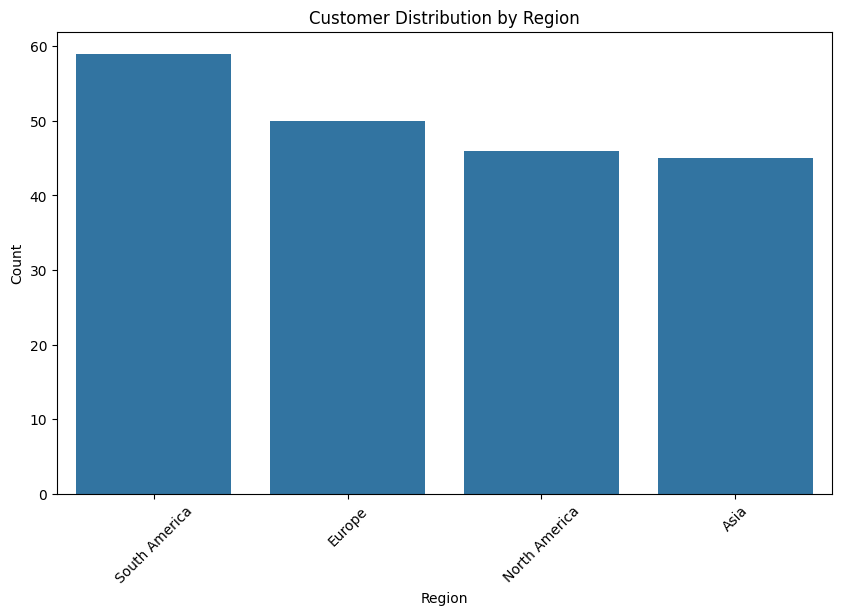

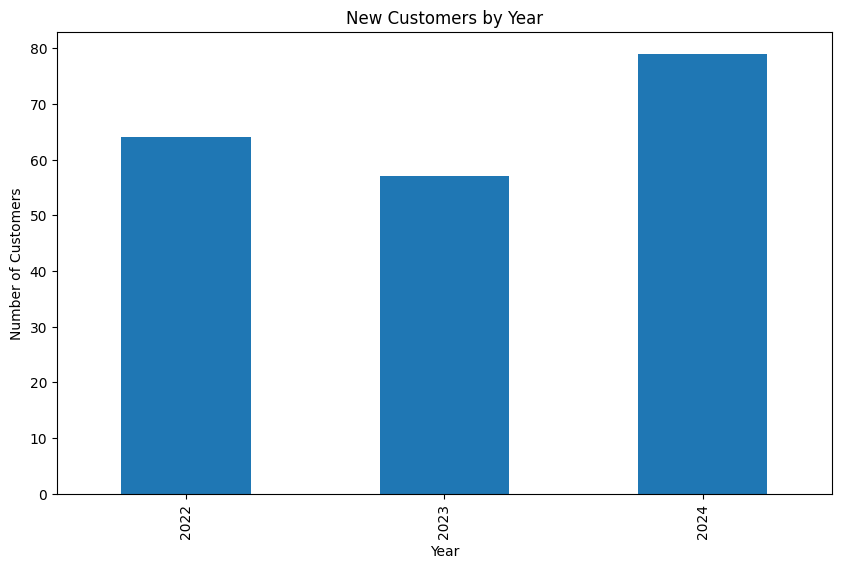

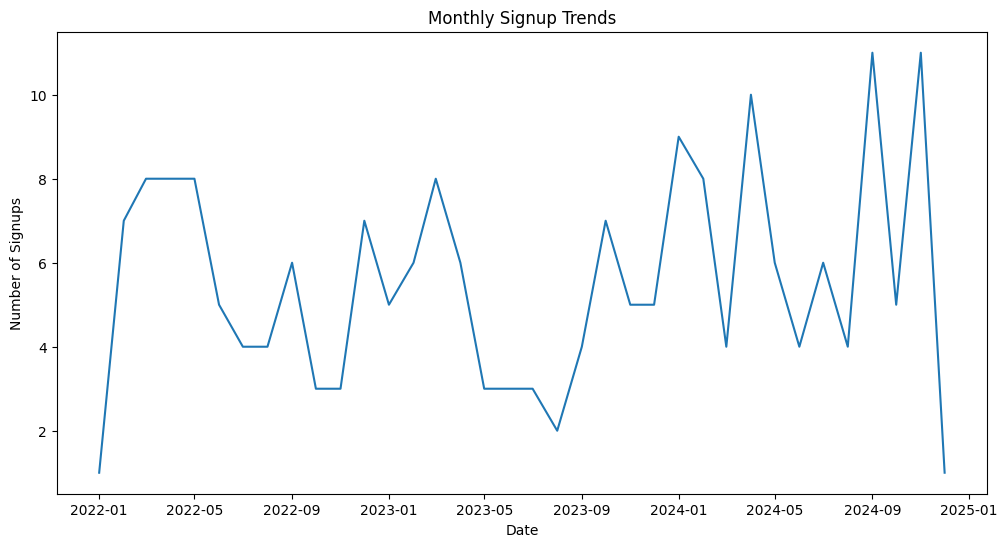

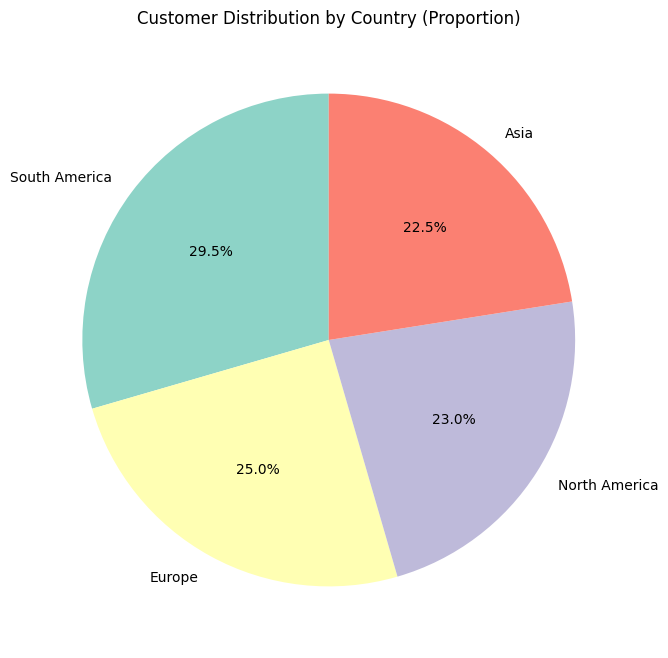

In [7]:
# import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load the data set for customer.csv
file_path="D:/zeotap/Customers - Customers.csv"
df=pd.read_csv(file_path)

# checking for null values and duplicate values
print("Null Values per Column:")
print(df.isnull().sum())
print("Number of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# data cleaning Process
if df.isnull().sum().any():
    print("Null Values...")
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True) # based on mode
        else:
            df[col].fillna(df[col].mean(), inplace=True)  # based on mean

#convert tha data of signupdate to datatime format 
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

# convert the signupdate to date,month separtly
df['SignupYear'] = df['SignupDate'].dt.year
df['SignupMonth'] = df['SignupDate'].dt.month

# To find the different country with the values 
print("\nUnique Values in 'Region':", df['Region'].unique())

# Analysis somne datas
# 1. Customer Distribution by Country
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. New Customers Over particular Time
plt.figure(figsize=(10, 6))
df['SignupYear'].value_counts().sort_index().plot(kind='bar')
plt.title("New Customers by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()

# 3. Monthly Trend 
monthly_signups = df.groupby(['SignupYear', 'SignupMonth']).size().reset_index(name='Count')
monthly_signups['SignupDate'] = pd.to_datetime(monthly_signups['SignupYear'].astype(str) + '-' + monthly_signups['SignupMonth'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(x='SignupDate', y='Count', data=monthly_signups)
plt.title("Monthly Signup Trends")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.show()

# 4. Regional Analysis: Proportions
plt.figure(figsize=(8, 8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title("Customer Distribution by Country (Proportion)")
plt.ylabel("")  
plt.show()